In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

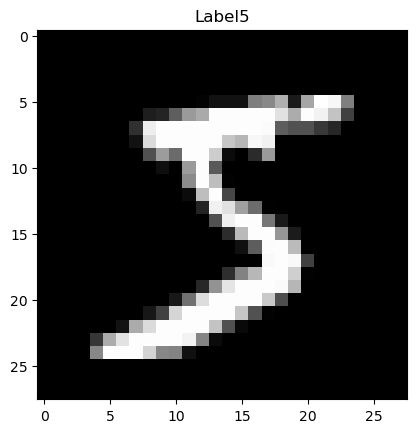

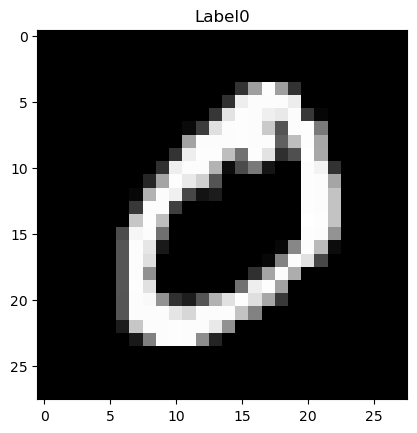

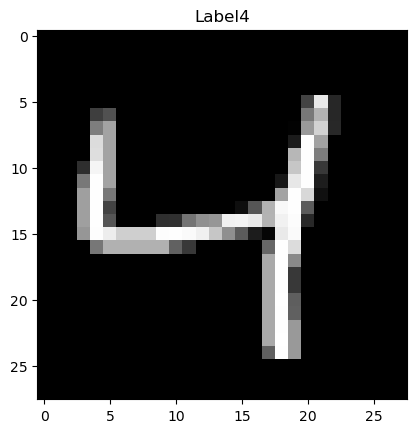

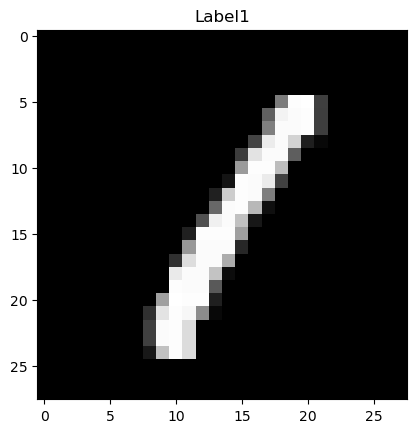

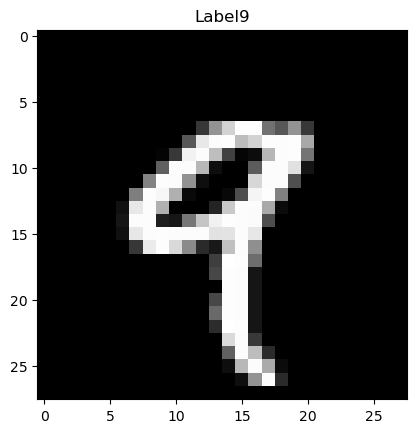

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

for i in range(5):
    plt.imshow(x_train[i],cmap='gray')
    plt.title('Label'+str(y_train[i]))
    plt.show()

In [3]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [4]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [5]:
print(f'training data shape:{x_train.shape},labels shape:{y_train.shape}')
print(f'test data shape:{x_test.shape},labels shape:{y_test.shape}')

training data shape:(60000, 28, 28, 1),labels shape:(60000,)
test data shape:(10000, 28, 28, 1),labels shape:(10000,)


In [6]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [7]:
model=models.Sequential()

In [8]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.add(layers.MaxPooling2D((2, 2)))

In [11]:
model.add(layers.Dropout(0.25))

In [12]:
model.add(layers.Flatten())

In [13]:
model.add(layers.Dense(128, activation='relu'))

In [14]:
model.add(layers.Dropout(0.5))

In [15]:
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.8686 - loss: 0.4124 - val_accuracy: 0.9835 - val_loss: 0.0491
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9734 - loss: 0.0883 - val_accuracy: 0.9872 - val_loss: 0.0387
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.9803 - loss: 0.0643 - val_accuracy: 0.9859 - val_loss: 0.0431
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9839 - loss: 0.0521 - val_accuracy: 0.9898 - val_loss: 0.0315
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.9862 - loss: 0.0436 - val_accuracy: 0.9909 - val_loss: 0.0299


In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9889 - loss: 0.0363
Test accuracy: 0.9909


In [45]:
history.history['accuracy']

[0.9354333281517029,
 0.9749666452407837,
 0.9808833599090576,
 0.98416668176651,
 0.9864500164985657]

In [49]:
history.history['val_accuracy']

[0.9835000038146973,
 0.9872000217437744,
 0.9858999848365784,
 0.989799976348877,
 0.9908999800682068]

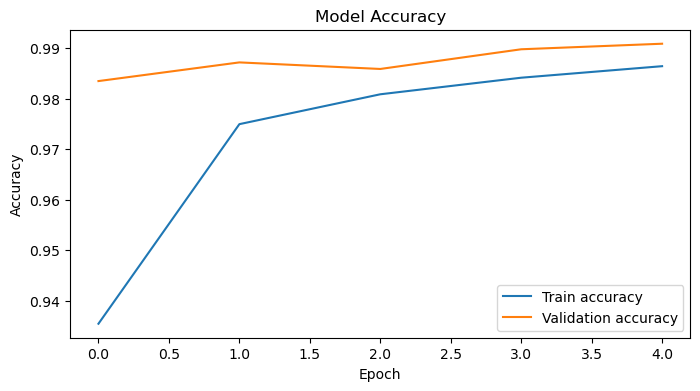

In [56]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label="Train accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

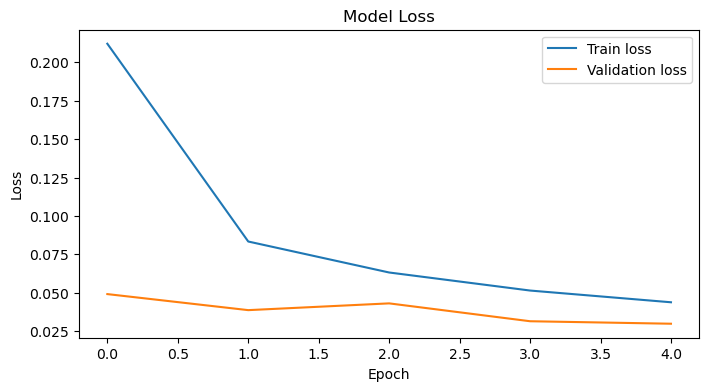

In [58]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()